# House Regression Challenge (Kaggle)

Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

Load and inspect data

In [2]:
# import Train Data
train = pd.read_csv('https://raw.githubusercontent.com/MattBrew/KaggleHouseRegression/main/train.csv')
# import Test Data
test = pd.read_csv('https://raw.githubusercontent.com/MattBrew/KaggleHouseRegression/main/test.csv')

# assemble into df, while preserving the index, look at head and tail
df = pd.concat([train,test], keys = ['Train','Test'])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
Train 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
      4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

        MoSold YrSold  SaleType  SaleCondition  SalePrice  
Train 0      2   2008        WD         Normal   208500.0  
      1      5   2007        WD         Normal   181500.0  
      2      9   2008        WD         Normal   223500.0  
      3      2   2006        WD        Abnorml   140000.0  
      4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

In [3]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
Test 1454  2915         160       RM         21.0     1936   Pave   NaN   
     1455  2916         160       RM         21.0     1894   Pave   NaN   
     1456  2917          20       RL        160.0    20000   Pave   NaN   
     1457  2918          85       RL         62.0    10441   Pave   NaN   
     1458  2919          60       RL         74.0     9627   Pave   NaN   

          LotShape LandContour Utilities  ... PoolArea PoolQC  Fence  \
Test 1454      Reg         Lvl    AllPub  ...        0    NaN    NaN   
     1455      Reg         Lvl    AllPub  ...        0    NaN    NaN   
     1456      Reg         Lvl    AllPub  ...        0    NaN    NaN   
     1457      Reg         Lvl    AllPub  ...        0    NaN  MnPrv   
     1458      Reg         Lvl    AllPub  ...        0    NaN    NaN   

          MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  \
Test 1454         NaN       0      6   2006        WD         Normal   
     1455         NaN       0      4   2006        WD        Abnorml   
     1456         NaN       0      9   2006        WD        Abnorml   
     1457        Shed     700      7   2006        WD         Normal   
     1458         NaN       0     11   2006        WD         Normal   

           SalePrice  
Test 1454        NaN  
     1455        NaN  
     1456        NaN  
     1457        NaN  
     1458        NaN  

[5 rows x 81 columns]

# Inspect Target Variable: Sale Price

<AxesSubplot:>

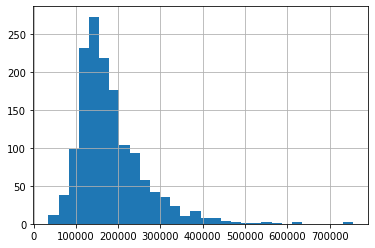

In [4]:
df['SalePrice'].hist(bins = 30)

In [5]:
# skewness and kurtosis
print ("Skewness: %f" % df['SalePrice'].skew())
print ("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Sale Price is approximately normal, but is right skewed. This will be addressed later.

In [6]:
# rank features by correlation with SalePrice

df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

It appears that some features are not well correlated with Sale Price. we will not eliminate any features yet, but this is good to note; there is room for paring down our model.

# Fill in Missing Values

In [7]:
# identify all columns with at least one missing value
null_frame = pd.isnull(df).sum()
null_frame[null_frame > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

Not all missing values will be treated equally. Some of them are more meaningful than others. There will be four categories for columns with missing data:
- Mode filled: categorical features without a meaningful NA
- Mean filled: numerical features without meaningful NA
- 'None' filled: categorical features with a meaningful NA
- Zero filled: numerical features with a meaningful NA

In [8]:
mode_fill = ['MSZoning',
             'Utilities',
             'Exterior1st',
             'Exterior2nd',
             'Electrical',
             'KitchenQual',
             'Functional',
             'SaleType'
            ]
mean_fill = ['LotFrontage']
none_fill = ['Alley',
             'MasVnrType',
             'BsmtQual',
             'BsmtCond',
             'BsmtExposure',
             'BsmtFinType1',
             'BsmtFinType2',
             'FireplaceQu',
             'GarageType',
             'GarageFinish',
             'GarageQual',
             'GarageCond',
             'PoolQC',
             'Fence',
             'MiscFeature'
            ]
zero_fill = ['MasVnrArea',
             'BsmtFinSF1',
             'BsmtFinSF2',
             'BsmtUnfSF',
             'TotalBsmtSF',
             'BsmtFullBath',
             'BsmtHalfBath',
             'GarageYrBlt',
             'GarageCars',
             'GarageArea'
            ]

In [9]:
# construct four for (ha!) loops to impute missing values
for feature in mode_fill:
    df[feature] = df[feature].fillna(mode(df[feature]))

for feature in mean_fill:
    df[feature] = df[feature].fillna(np.mean(df[feature]))

for feature in none_fill:
    df[feature] = df[feature].fillna('None')
    
for feature in zero_fill:
    df[feature] = df[feature].fillna(0)

Now verify that all the missing values are taken care of:

In [10]:
null_frame_check = pd.isnull(df).sum()
null_frame_check[null_frame_check > 0]

SalePrice    1459
dtype: int64

Good. Sale price is still registering as NA because of the test set of data.

# Data Wrangling, Dimension Reduction,  Feature Engineering

First we will attempt to normalize the target variable. Since SalePrice is right skewed, we will attempt a logarithmic transformation.

Skewness: 0.632800
Kurtosis: 1.877368


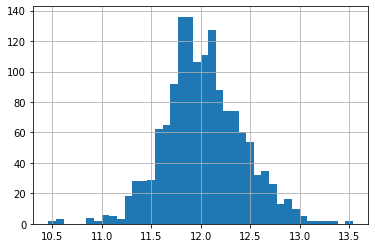

In [11]:
np.log(df['SalePrice']).hist(bins = 40)
print ('Skewness: %f' % np.log(df['SalePrice'].skew()))
print ('Kurtosis: %f' % np.log(df['SalePrice'].kurt()))

A log transformation bring the skewness down from 1.9 to 0.6. We will create a new feature with the log of the price.

In [12]:
df['LogPrice'] = np.log(df['SalePrice'])
df['LogPrice'].head()

Train  0    12.247694
       1    12.109011
       2    12.317167
       3    11.849398
       4    12.429216
Name: LogPrice, dtype: float64

Now that the data is clean, let's look again at the correlations with SalePrice:

In [13]:
df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
LogPrice         0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334820
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr

Let's examine the plot of Garage Cars vs. Garage Area. They have almost the same correlation with SalePrice and probably tell us the same information.

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

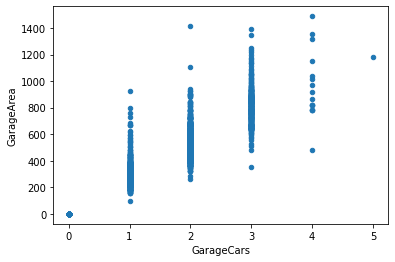

In [14]:
df.plot.scatter('GarageCars','GarageArea')

We will drop garage cars to avoid redundancy

In [15]:
columns_to_drop = ['GarageCars',
                   'PoolArea',
                   'MoSold',
                   '3SsnPorch',
                   'BsmtFinSF2',
                   'BsmtHalfBath',
                   'MiscVal',
                   'LowQualFinSF',
                   'YrSold',
                   'OverallCond'
                  ]
for column in columns_to_drop:
    df = df.drop(column, axis = 1)

In [16]:
# according to the data description, MSSubClass is actually categorical
df['MSSubClass'] = df['MSSubClass'].astype('str')

Let's consider whether any of our categorical variables are ordinal in nature and correct that.

The following variables would be considered ordinal:
 - ExterQual
 - ExterCond
 - BsmtQual
 - BsmtCond
 - BsmtExposure
 - BsmtFinType1
 - BsmtFinType2
 - HeatingQC
 - KitchenQual
 - Functional
 - FireplaceQu
 - GarageFinish
 - GarageQual
 - GarageCond
 - PoolQC
 - Fence
 
Apparently it's really good that we thought about it this way. By making these numerical, we avoid overburdening our model with dummy variables. We will now encode these numerically according to the following schema.

In [17]:
schema1 = {'Ex':4,
           'Gd':3,
           'TA':2,
           'Fa':1,
           'Po':0,
          } # ExterQual, ExterCond, HeatingQC, KitchenQual
schema2 = {'Ex':5,
           'Gd':4,
           'TA':3,
           'Fa':2,
           'Po':1,
           'None':0
          } # BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond, PoolQC
schema3 = {
           'Gd':4,
           'Av':3,
           'Mn':2,
           'No':1,
           'None':0
          } # BsmtExposure
schema4 = {'GLQ':6,
           'ALQ':5,
           'BLQ':4,
           'Rec':3,
           'LwQ':2,
           'Unf':1,
           'None':0
          } # BsmtFinType1, BsmtFinType2
schema5 = {'Typ':7,
           'Min1':6,
           'Min2':5,
           'Mod':4,
           'Maj1':3,
           'Maj2':2,
           'Sev':1,
           'Sal':0
          } # Functional
schema6 = {'Fin':3,
           'RFn':2,
           'Unf':1,
           'None':0
          } # GarageFinish
schema7 = {'GdPrv':4,
           'MnPrv':3,
           'GdWo':2,
           'MnWw':1,
           'None':0
          } # Fence

In [18]:
def encoder(val, schema):
    if val in schema.keys():
        val = schema[val]
    return val

In [19]:
for x in ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']:
    df[x] = df[x].apply(lambda x: encoder(x, schema1))

for x in ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']:
    df[x] = df[x].apply(lambda x: encoder(x, schema2))

df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x: encoder(x, schema3))

for x in ['BsmtFinType1', 'BsmtFinType2']:
    df[x] = df[x].apply(lambda x: encoder(x, schema4))
    
df['Functional'] = df['Functional'].apply(lambda x: encoder(x, schema5))

df['GarageFinish'] = df['GarageFinish'].apply(lambda x: encoder(x, schema6))

df['Fence'] = df['Fence'].apply(lambda x: encoder(x, schema7))

Now that we've made those ordinal variables numerical, let's look at their correlation again.

In [20]:
ordinals_plus_sp = ['ExterQual',
  'ExterCond',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'HeatingQC',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PoolQC',
  'Fence',
  'SalePrice']
df[ordinals_plus_sp].corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
ExterQual       0.682639
KitchenQual     0.659600
BsmtQual        0.585207
GarageFinish    0.549247
FireplaceQu     0.520438
HeatingQC       0.427649
BsmtExposure    0.374696
BsmtFinType1    0.304908
GarageQual      0.273839
GarageCond      0.263191
BsmtCond        0.212607
PoolQC          0.111696
Functional      0.107619
ExterCond       0.018899
BsmtFinType2   -0.005323
Fence          -0.146942
Name: SalePrice, dtype: float64

In [21]:
columns_to_drop = ['ExterCond','BsmtFinType2']
df = df.drop(columns_to_drop, axis = 1)

In [22]:
df

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
Train 0        1         60       RL         65.0     8450   Pave  None   
      1        2         20       RL         80.0     9600   Pave  None   
      2        3         60       RL         68.0    11250   Pave  None   
      3        4         70       RL         60.0     9550   Pave  None   
      4        5         60       RL         84.0    14260   Pave  None   
...          ...        ...      ...          ...      ...    ...   ...   
Test  1454  2915        160       RM         21.0     1936   Pave  None   
      1455  2916        160       RM         21.0     1894   Pave  None   
      1456  2917         20       RL        160.0    20000   Pave  None   
      1457  2918         85       RL         62.0    10441   Pave  None   
      1458  2919         60       RL         74.0     9627   Pave  None   

           LotShape LandContour Utilities  ... OpenPorchSF EnclosedPorch  \
Train 0         Reg         Lvl    AllPub  ...          61             0   
      1         Reg         Lvl    AllPub  ...           0             0   
      2         IR1         Lvl    AllPub  ...          42             0   
      3         IR1         Lvl    AllPub  ...          35           272   
      4         IR1         Lvl    AllPub  ...          84             0   
...             ...         ...       ...  ...         ...           ...   
Test  1454      Reg         Lvl    AllPub  ...           0             0   
      1455      Reg         Lvl    AllPub  ...          24             0   
      1456      Reg         Lvl    AllPub  ...           0             0   
      1457      Reg         Lvl    AllPub  ...          32             0   
      1458      Reg         Lvl    AllPub  ...          48             0   

           ScreenPorch PoolQC Fence MiscFeature SaleType  SaleCondition  \
Train 0              0      0     0        None       WD         Normal   
      1              0      0     0        None       WD         Normal   
      2              0      0     0        None       WD         Normal   
      3              0      0     0        None       WD        Abnorml   
      4              0      0     0        None       WD         Normal   
...                ...    ...   ...         ...      ...            ...   
Test  1454           0      0     0        None       WD         Normal   
      1455           0      0     0        None       WD        Abnorml   
      1456           0      0     0        None       WD        Abnorml   
      1457           0      0     3        Shed       WD         Normal   
      1458           0      0     0        None       WD         Normal   

            SalePrice   LogPrice  
Train 0      208500.0  12.247694  
      1      181500.0  12.109011  
      2      223500.0  12.317167  
      3      140000.0  11.849398  
      4      250000.0  12.429216  
...               ...        ...  
Test  1454        NaN        NaN  
      1455        NaN        NaN  
      1456        NaN        NaN  
      1457        NaN        NaN  
      1458        NaN        NaN  

[2919 rows x 70 columns]

# Normalize numeric variables that are highly skewed

In [23]:
numeric_columns = list(df.corr().columns)

In [24]:
for attribute in numeric_columns:
    if df[attribute].skew() > 1:
        print (attribute + '   Skew: %f' % df[attribute].skew())

LotFrontage   Skew: 1.646420
LotArea   Skew: 12.829025
MasVnrArea   Skew: 2.614936
BsmtExposure   Skew: 1.117303
BsmtFinSF1   Skew: 1.425963
TotalBsmtSF   Skew: 1.157489
1stFlrSF   Skew: 1.470360
GrLivArea   Skew: 1.270010
KitchenAbvGr   Skew: 4.304467
WoodDeckSF   Skew: 1.843380
OpenPorchSF   Skew: 2.536417
EnclosedPorch   Skew: 4.005950
ScreenPorch   Skew: 3.948723
PoolQC   Skew: 18.418603
Fence   Skew: 1.755731
SalePrice   Skew: 1.882876


We'll inspect the columns with the highest skew and see what can be done.

First is lot area:

<AxesSubplot:title={'center':'Lot Area'}, ylabel='Frequency'>

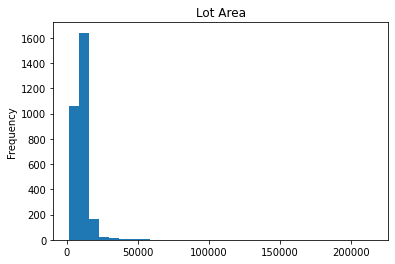

In [25]:
df['LotArea'].plot(kind = 'hist', title = 'Lot Area', bins = 30)

<AxesSubplot:title={'center':'Root Lot Area'}, ylabel='Frequency'>

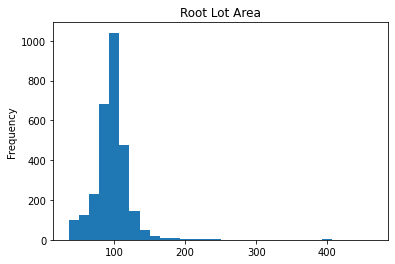

In [26]:
(df['LotArea'] ** 0.5).plot(kind = 'hist', title = 'Root Lot Area', bins = 30)

In [27]:
df['LotAreaRoot'] = df['LotArea'] ** 0.5
df = df.drop('LotArea', axis = 1)

Now we'll look at masonry veneer area

<AxesSubplot:title={'center':'Masonry Veneer Area'}, ylabel='Frequency'>

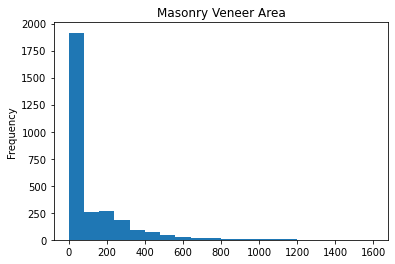

In [28]:
df['MasVnrArea'].plot(kind = 'hist', title = 'Masonry Veneer Area', bins = 20)

<AxesSubplot:title={'center':'Root Masonry Veneer Area'}, ylabel='Frequency'>

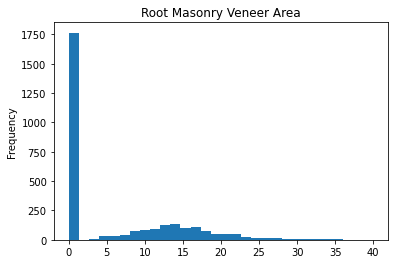

In [29]:
(df['MasVnrArea'] ** 0.5).plot(kind = 'hist', title = 'Root Masonry Veneer Area', bins = 30)

In [30]:
df['MasVnrAreaRoot'] = df['MasVnrArea'] ** 0.5
df = df.drop('MasVnrArea', axis = 1)

# Create Dummy Variables

In [31]:
df = pd.get_dummies(df, drop_first = True)

# Partition dataframe into train and test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_clean = df.xs(key = 'Train')
test_clean = df.xs(key = 'Test')
train_clean = train_clean.drop(['Id','SalePrice'], axis = 1)

In [34]:
X = train_clean.drop('LogPrice', axis = 1)
y = train_clean['LogPrice']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

# Models

Import all modules

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNetCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [37]:
# Scorekeepers Table
score_keeper = dict()

## Linear Regression

In [38]:
reg = LinearRegression()
reg.fit(X_train, y_train)
scores = cross_val_score(reg, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')
print ('Cross Validation RMSE: ', np.mean(scores) * -1)

Cross Validation RMSE:  0.13825191956376387


In [39]:
predictions = reg.predict(X_test).reshape(-1,1)
lm_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print ('RMSE of Linear Regression Model: ', 
       lm_rmse)
score_keeper['Linear Regression'] = lm_rmse

RMSE of Linear Regression Model:  0.21100850332687104


## Ridge Regression

In [40]:
ridge = Ridge(alpha = 11.7)
ridge.fit(X_train, y_train)
scores = cross_val_score(ridge, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')
print ('Cross Validation RMSE: ', np.mean(scores) * -1)

Cross Validation RMSE:  0.13229831535445788


In [41]:
predictions = ridge.predict(X_test).reshape(-1,1)
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print ('RMSE of Ridge Model: ', 
       ridge_rmse)
score_keeper['Ridge'] = ridge_rmse

RMSE of Ridge Model:  0.16949600615171515


## Gradient Boosting Regression

In [42]:
params = {'n_estimators':500,
          'max_depth':4,
          'min_samples_split':5,
          'learning_rate':0.01,
          'loss':'ls'
         }
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
scores = cross_val_score(gbr, X_train, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')
print ('Cross Validation RMSE: ', np.mean(scores) * -1)

Cross Validation RMSE:  0.14256486275276864


In [43]:
predictions = gbr.predict(X_test).reshape(-1,1)
gbr_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print ('RMSE of GBR Model: ', 
       gbr_rmse)
score_keeper['Gradient Boost'] = gbr_rmse

RMSE of GBR Model:  0.12639031190298677


## Elastic Net

In [44]:
elasticnet = ElasticNetCV(cv = 5, random_state = 0)
elasticnet.fit(X_train, y_train)
predictions = elasticnet.predict(X_test).reshape(-1,1)
elastic_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print ('RMSE of Elastic Net Model: ', 
       elastic_rmse)
score_keeper['Elastic Net'] = elastic_rmse

RMSE of Elastic Net Model:  0.23175699690549317


## Support Vector Machine

In [45]:
svm = SVR()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test).reshape(-1,1)
svm_rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print ('RMSE of SVM: ', 
       svm_rmse)
score_keeper['SVM'] = svm_rmse

RMSE of SVM:  0.17092601858733525


# Model Comparison

In [46]:
pd.DataFrame(score_keeper.values(), index = score_keeper.keys(), columns = ['RMSE']).sort_values('RMSE')

,RMSE
Gradient Boost,0.126390
Ridge,0.169496
SVM,0.170926
Linear Regression,0.211009
Elastic Net,0.231757


# Submission History

- Submitted Gradient Boosted Model Predictions 
    - Date: 12/10/20
    - RMSE: 0.14297
    - Parameters: n_estimators: 500, max_depth: 4, min_samples_split: 5, learning_rate: 0.01, loss: 'ls'
    - Leaderboard Position: 2676 / 5406 (49th percentile)